In [1]:
import covid19_inference as cov19
import matplotlib.pyplot as plt
import matplotlib
import datetime

In [2]:
owd = cov19.data_retrieval.OWD(True)
jhu = cov19.data_retrieval.JHU(True)
countries = ["Austria",
    "Belgium",
    "Croatia",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Greece",
    "Italy",
    #"Ireland",
    "Lithuania",
    "Latvia",
    #"Netherlands",
    "Norway",
    "Poland",
    "Portugal",
    "Serbia",
    "Slovakia",
    #"Spain",
    "Slovenia",
    #"Sweden",
    "Switzerland",
    "United Kingdom"]


INFO     [covid19_inference.data_retrieval.retrieval] Successfully loaded data from local
INFO     [covid19_inference.data_retrieval._JHU] Successfully loaded data from local


In [3]:

font = {'family' : 'DejaVu Sans',
        'weight' : 'normal',
        'size'   : 12}

matplotlib.rc('font', **font)

/home/sebastian/.local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)
INFO     [numexpr.utils] NumExpr defaulting to 8 threads.


Austria
Belgium
Croatia
Czech Republic
Denmark
Estonia
Finland
France
Greece
Italy
Lithuania
Latvia
Norway
Poland
Portugal
Serbia
Slovakia
Slovenia
Switzerland
United Kingdom


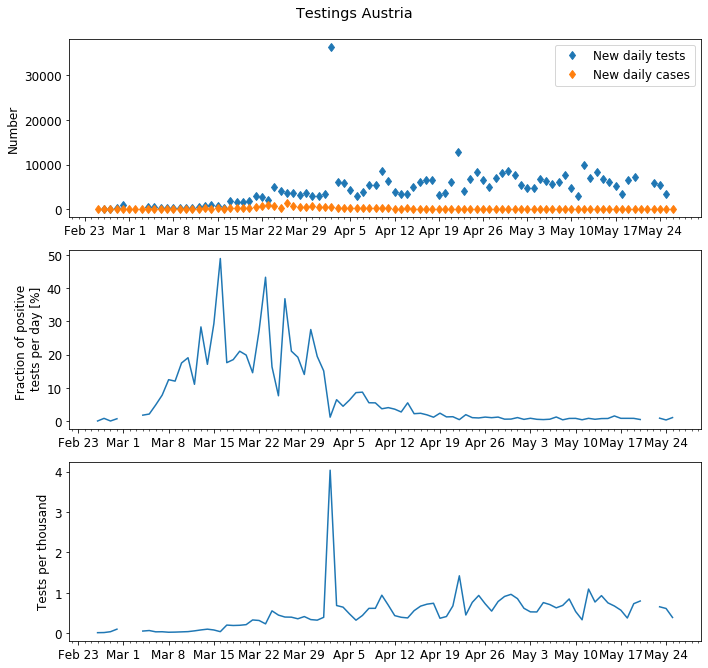

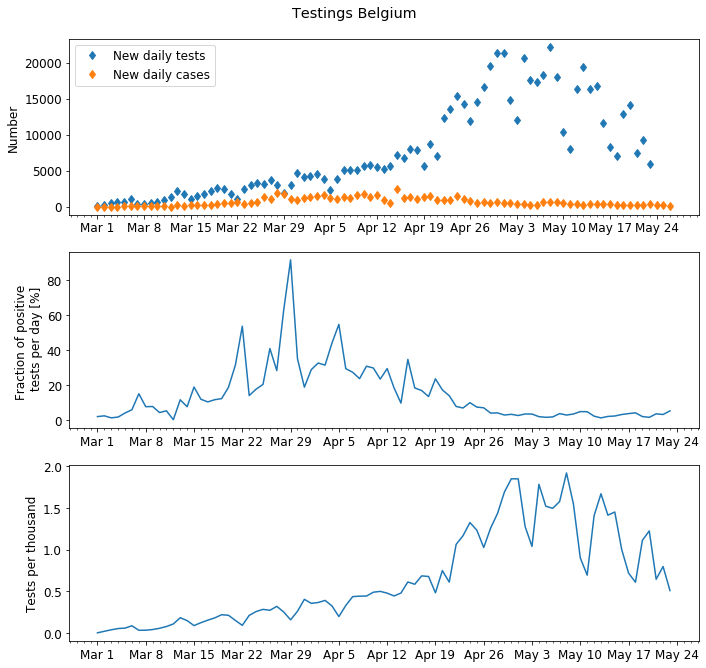

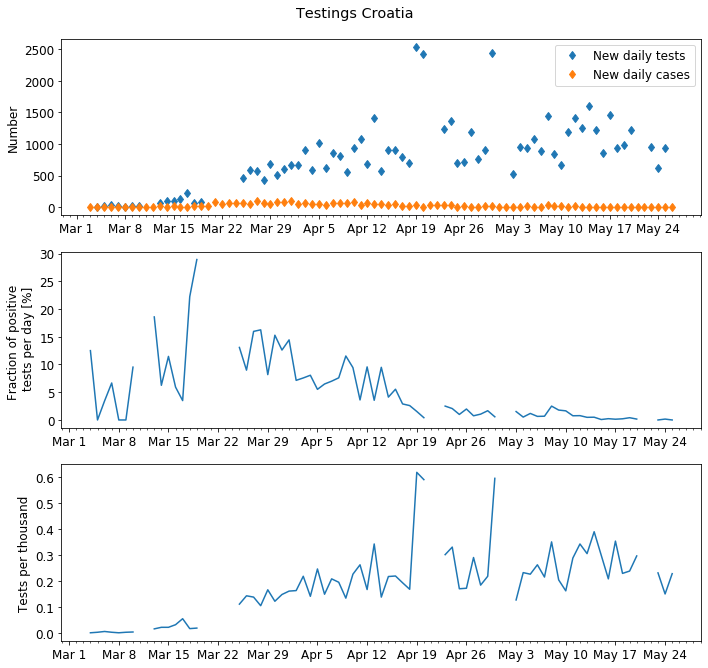

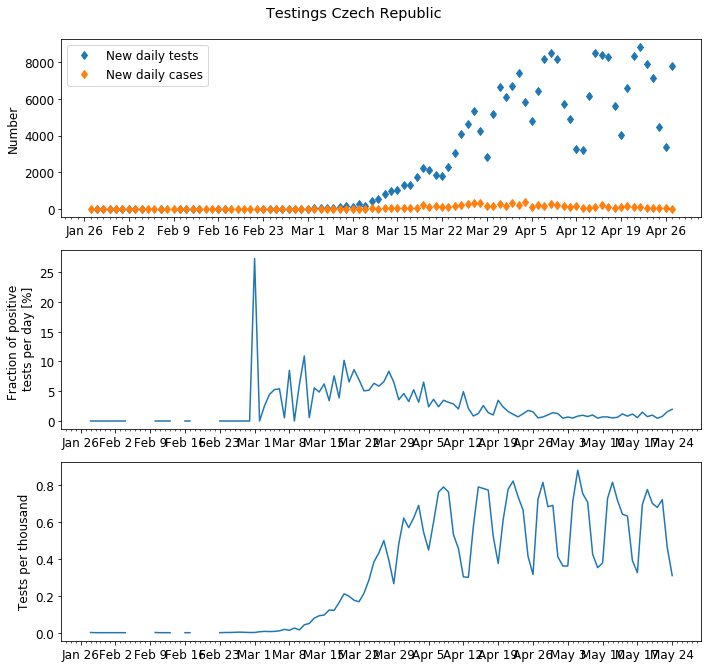

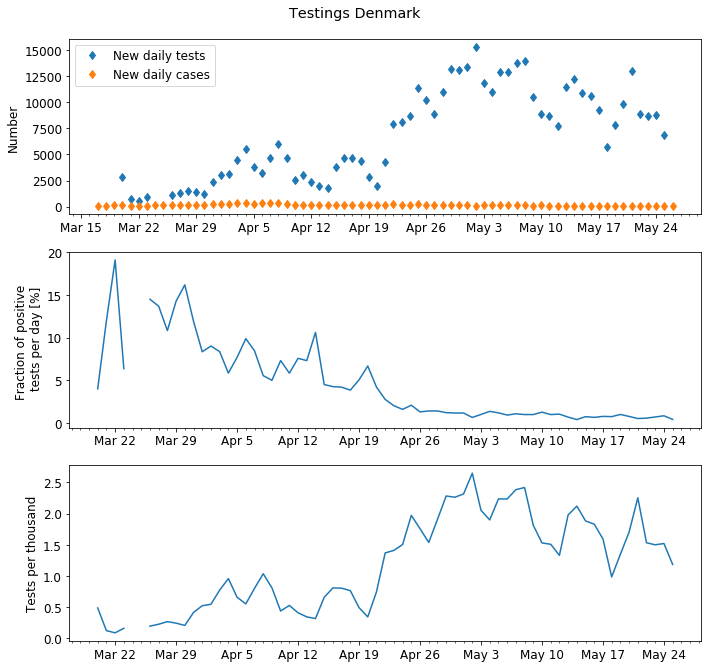

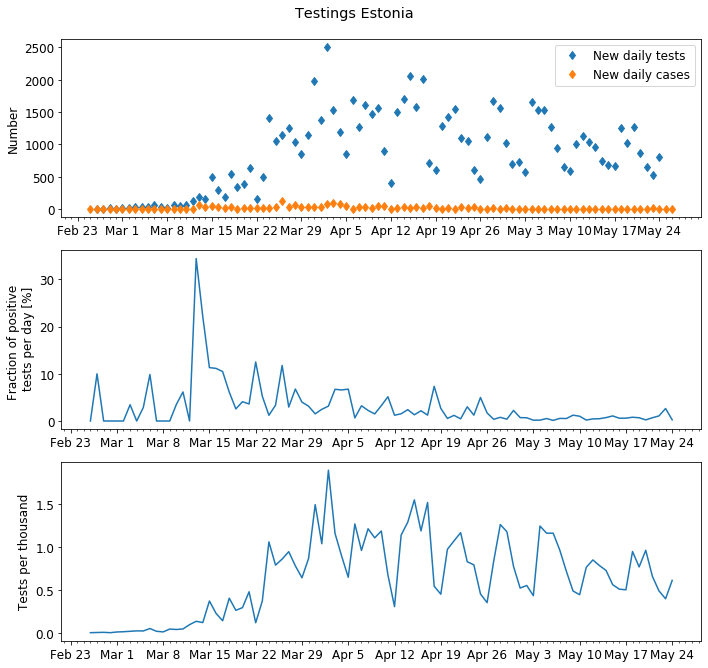

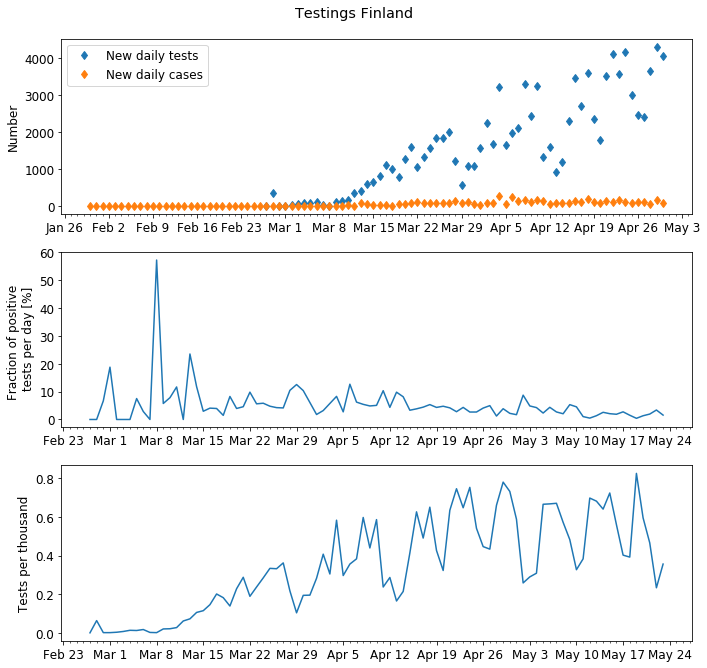

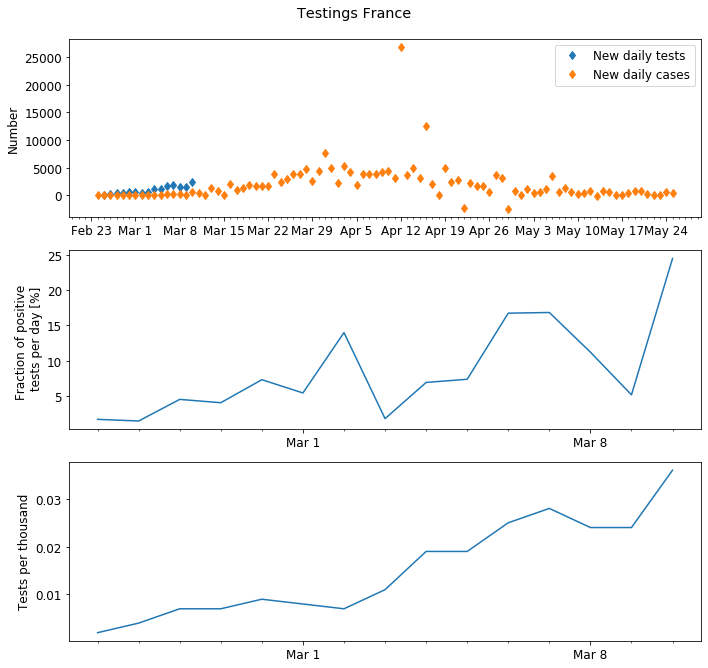

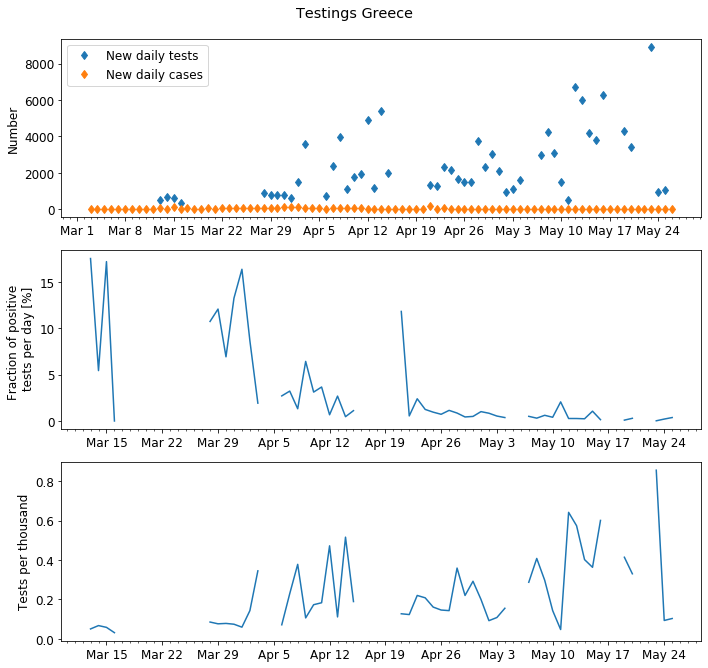

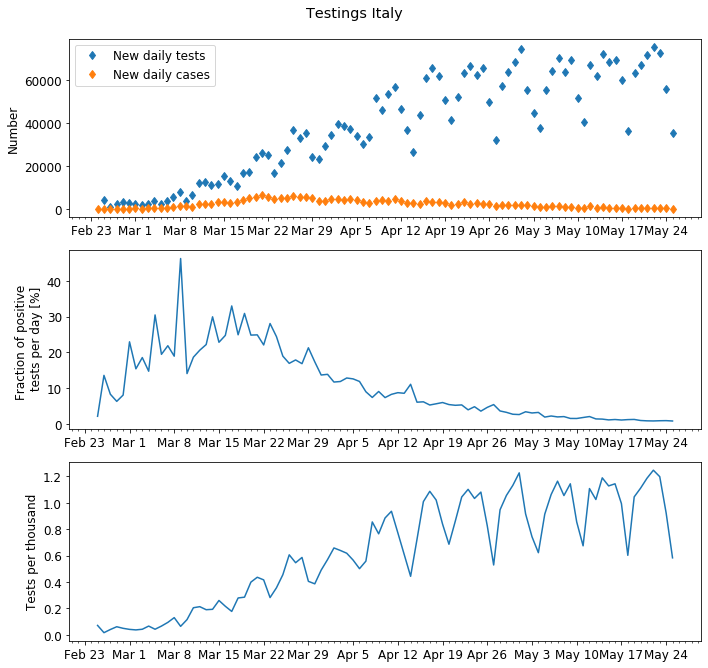

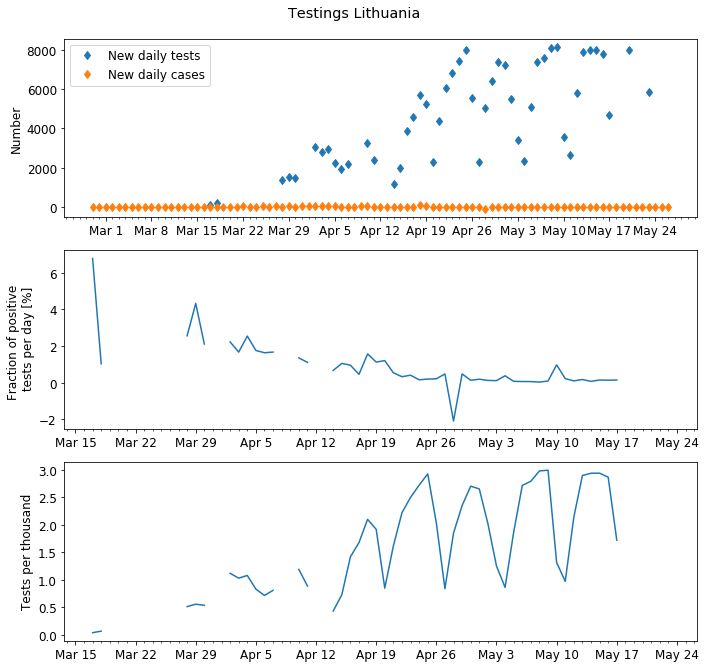

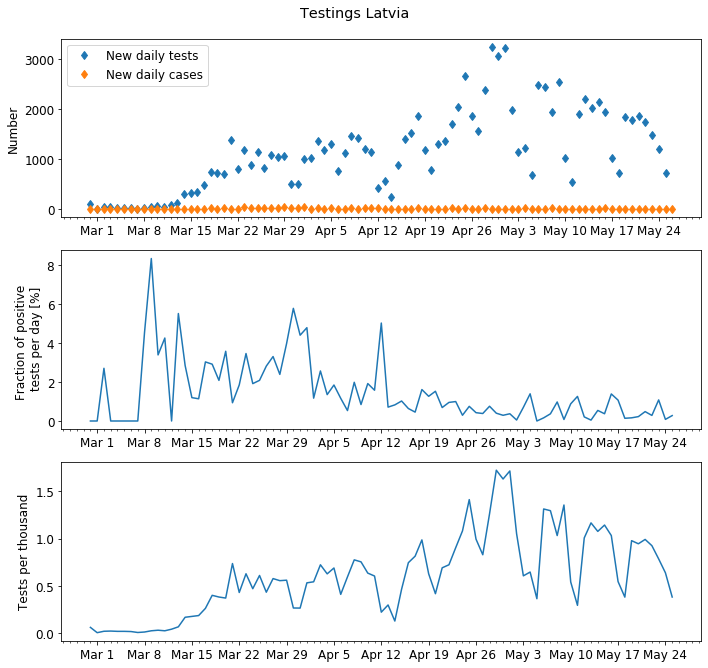

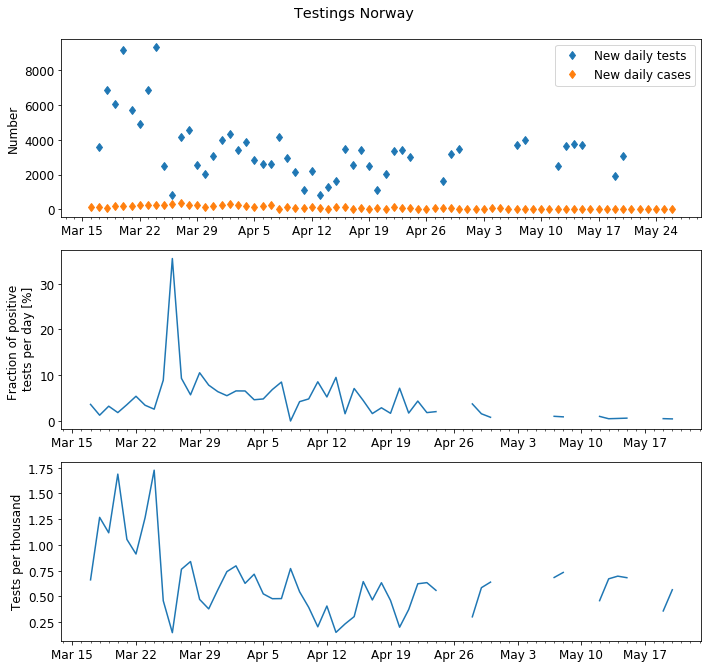

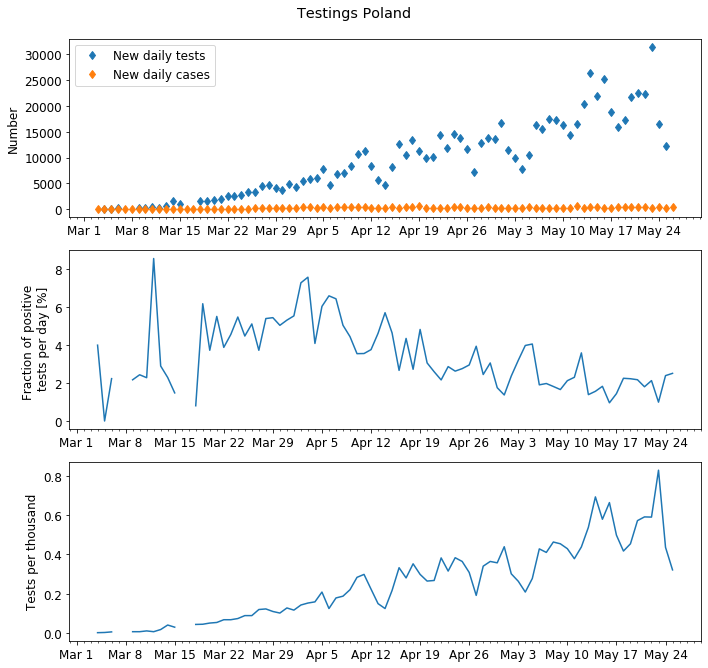

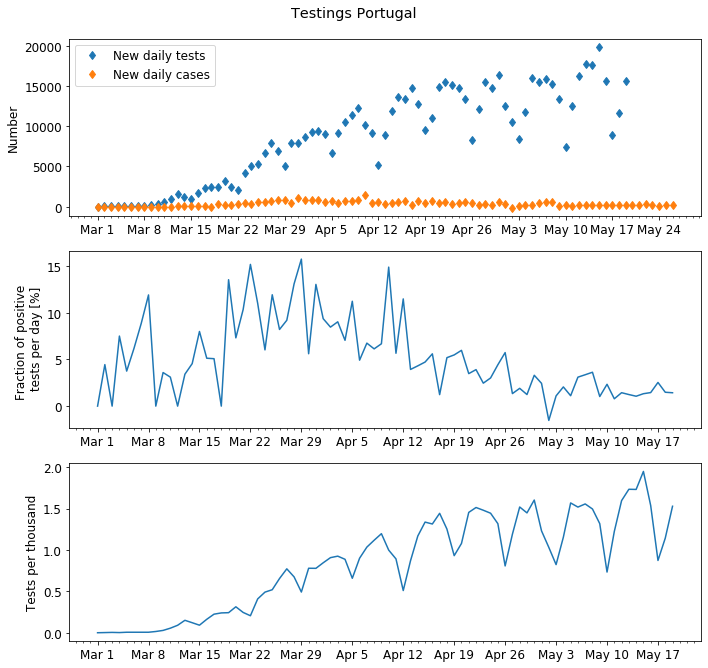

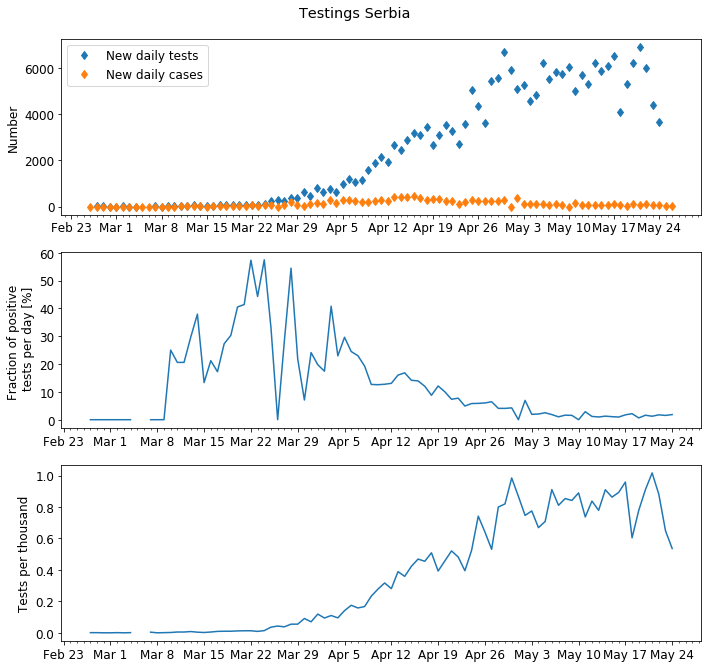

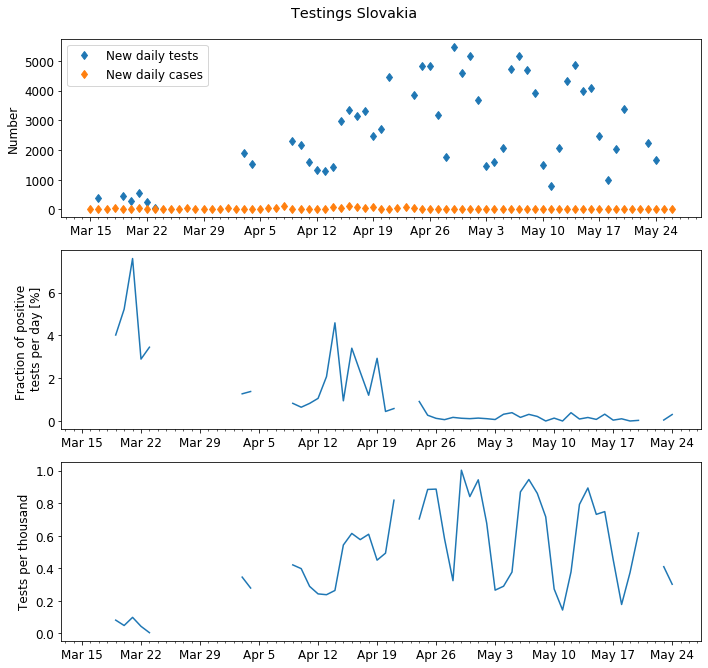

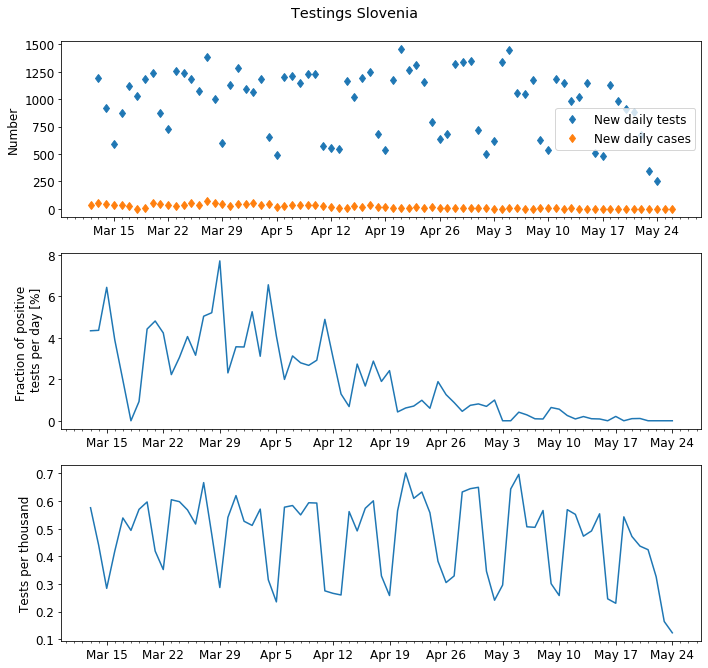

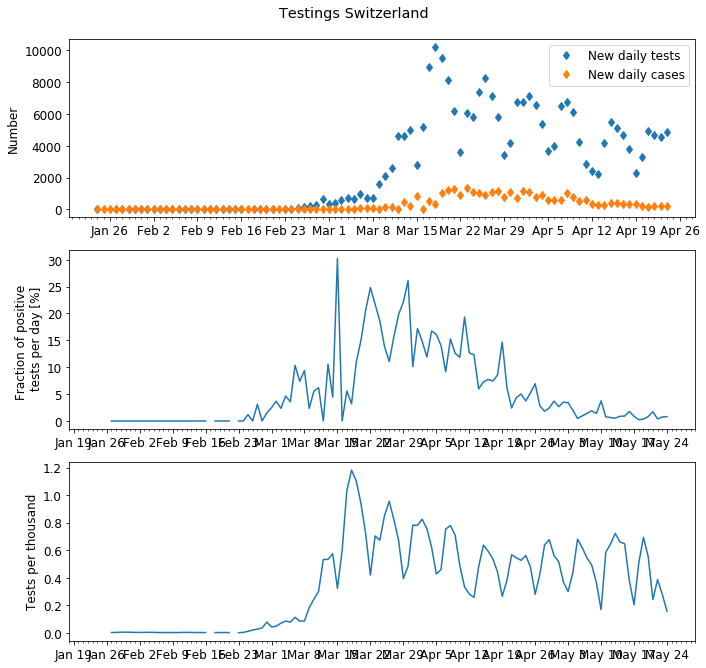

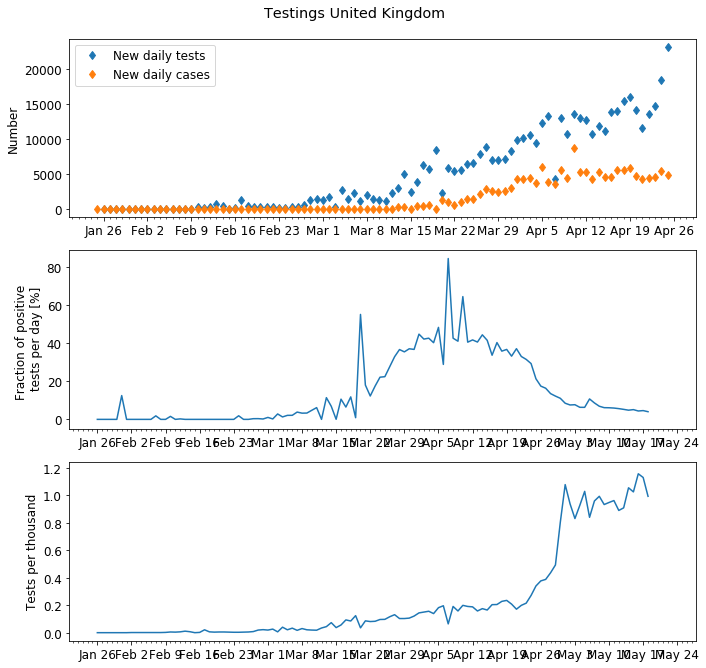

In [4]:
for this_country in countries:
    print(this_country)
    tests_cumu = owd.get_total("tests", country=this_country)
    tests_new = owd.get_new("tests", country=this_country)
    if this_country == "Czech Republic":
        cases_cumu = jhu.get_total("confirmed", country="Czechia")
        cases_new = jhu.get_new("confirmed", country="Czechia", data_begin=cases_cumu.index[1])
    else:
        cases_cumu = jhu.get_total("confirmed", country=this_country)
        cases_new = jhu.get_new("confirmed", country=this_country, data_begin=cases_cumu.index[1])
    tests_per_thousand = owd.data.loc[owd.data["country"] == this_country]["new_tests_per_thousand"]
    date_first_testings = tests_cumu.index[0]

    fig, ax = plt.subplots(3,figsize=(10,9))
    weeks = [date_first_testings + datetime.timedelta(days=i*7) for i in range(14)]

    fig.suptitle("Testings "+this_country,y=1.03)
    # Tests vs cumulative cases
    ax[0].plot(tests_new[weeks[0]:weeks[13]],"d",label="New daily tests")
    ax[0].plot(cases_new[weeks[0]:weeks[13]],"d",label="New daily cases")
    ax[0].set_ylabel("Number")
    cov19.plot._format_date_xticks(ax[0])
    ax[0].legend()

    # Percent
    percent = cases_new/tests_new*100
    ax[1].plot(percent)
    ax[1].set_ylabel("Fraction of positive \n tests per day [%]")
    cov19.plot._format_date_xticks(ax[1])

    # New
    ax[2].plot(tests_per_thousand)
    ax[2].set_ylabel("Tests per thousand")
    cov19.plot._format_date_xticks(ax[2])
    fig.tight_layout()
    plt.savefig("./figures/testings_"+this_country+".png",bbox_inches='tight')

# TODO Ireland, Netherlands, Spain and Sweden
Strange testing intervals need some more considerations

date
2020-03-09        NaN
2020-03-17     4852.0
2020-03-23    11356.0
2020-03-31    12221.0
2020-04-07    12271.0
2020-04-14    48162.0
2020-04-21    20938.0
2020-04-28    41470.0
2020-05-05    61707.0
2020-05-12    44047.0
2020-05-19    36818.0
Name: total_tests, dtype: float64


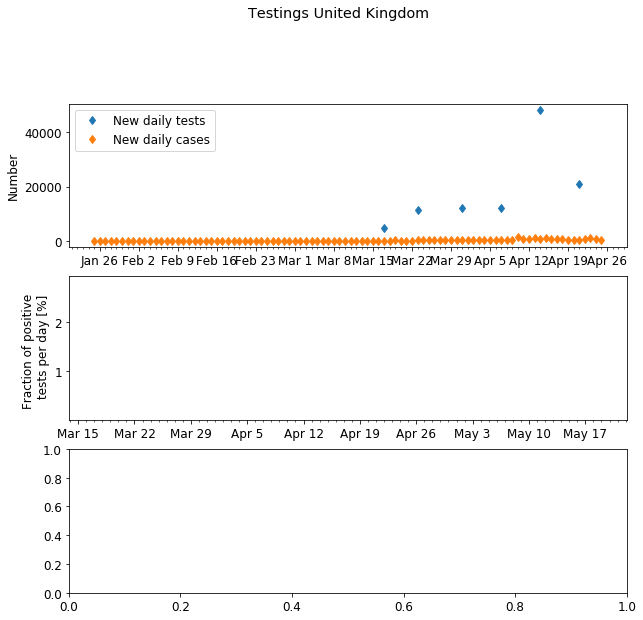

In [18]:
tests_cumu = owd.get_total("tests", country="Ireland")
tests_new = tests_cumu.diff()

cases_cumu = jhu.get_total("confirmed", country="Ireland")
cases_new = jhu.get_new("confirmed", country="Ireland", data_begin=cases_cumu.index[1])

fig, ax = plt.subplots(3,figsize=(10,9))
weeks = [date_first_testings + datetime.timedelta(days=i*7) for i in range(14)]

fig.suptitle("Testings "+this_country,y=1.03)
# Tests vs cumulative cases
ax[0].plot(tests_new[weeks[0]:weeks[13]],"d",label="New daily tests")
ax[0].plot(cases_new[weeks[0]:weeks[13]],"d",label="New daily cases")
ax[0].set_ylabel("Number")
cov19.plot._format_date_xticks(ax[0])
ax[0].legend()

# Percent
percent = cases_new/tests_new*100
print(tests_new)
ax[1].plot(percent)
ax[1].set_ylabel("Fraction of positive \n tests per day [%]")
cov19.plot._format_date_xticks(ax[1])


